# Topic: Correlation between student health and academic performance
### Group 7: Bansri Patel, Justin Yee, Kapilan Ramasamy, Nathaniel Morales, Shreya Agarwal

### 1. What data do you have?

### 2. What would you like to know?

### 3. Explore and present the data. (Generate statistics, perform visualizations)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr, pearsonr, spearmanr

                   Average_GPA
prioritize_health             
0.0                   3.472222
1.0                   3.451754


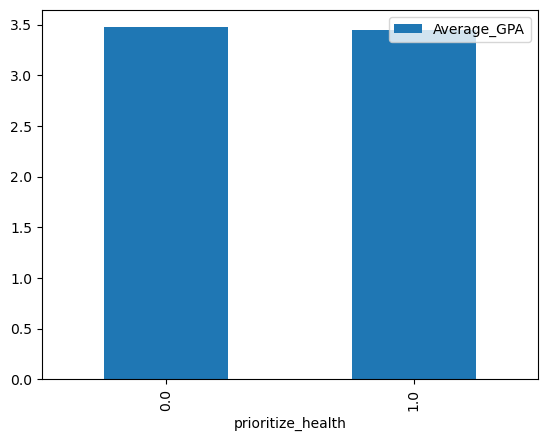

In [2]:
# Load the data
df = pd.read_csv('data.csv')

# Convert prioritize_health to numerical values
df['prioritize_health'] = df['prioritize_health'].apply(lambda x: 1 if x == 'Yes' else 0).astype(float)

# Format the GPA column
df['UCR_GPA'] = df['UCR_GPA'].str.replace('Below 2.0', '').str.replace('Prefer not to say', '')
# Split the GPA column into two new columns
df[['Lower_GPA', 'Upper_GPA']] = df['UCR_GPA'].str.split(' - ', expand=True)

# Convert the new columns to numerical values
df['Lower_GPA'] = pd.to_numeric(df['Lower_GPA'].replace('Below', '2.0'))
df['Upper_GPA'] = pd.to_numeric(df['Upper_GPA'].replace('Below', '2.0'))

# Calculate the average GPA
df['Average_GPA'] = (df['Lower_GPA'] + df['Upper_GPA']) / 2

# Create a list of imposter syndrome columns for different grade levels
imposter_syndrome_columns = ['imposter_syndrome_freshman', 'imposter_syndrome_sophomore', 'imposter_syndrome_junior', 'imposter_syndrome_senior', 'imposter_syndrome_graduate']

# Calculate the mean imposter syndrome score across grade levels
df['mean_imposter_syndrome'] = df[imposter_syndrome_columns].mean(axis=1)

# pivot table showing average GPA for students who prioritize health, and students who do not prioritize health.
health_priority_gpa = df.pivot_table(index=['prioritize_health'], values=['Average_GPA'], aggfunc='mean')

# Bar plot of the average GPA of students who prioritize health compared to who do not 
health_priority_gpa.plot(kind = 'bar')
print(health_priority_gpa)

prioritize_health  Average_GPA
0.0                2.25            1
                   2.75            5
                   3.25           27
                   3.75           39
1.0                2.25            3
                   2.75           20
                   3.25           53
                   3.75           95
Name: prioritize_health, dtype: int64


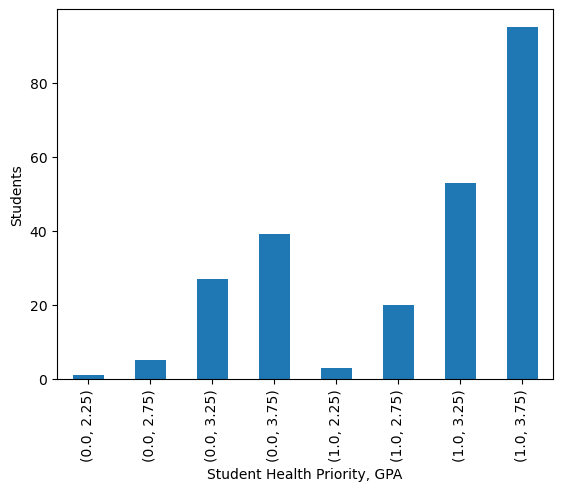

In [3]:
# Bar plot that shows the gpas of students who prioritize health and students who don't 
group_health_gpa = df.groupby(["prioritize_health", "Average_GPA"])["prioritize_health"].count()
group_health_gpa.plot(kind = 'bar')
plt.ylabel('Students')
plt.xlabel('Student Health Priority, GPA')
print(group_health_gpa)

prioritize_health
0.0     78
1.0    177
Name: prioritize_health, dtype: int64


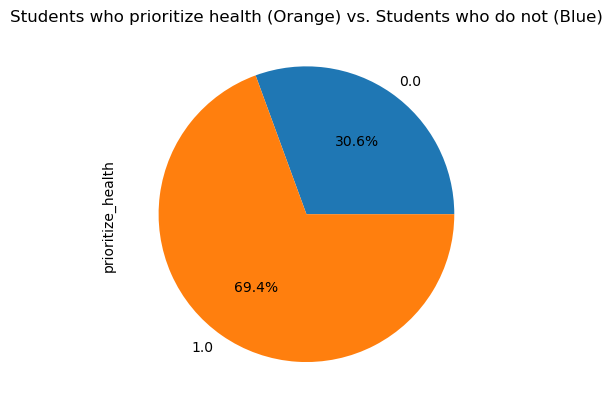

In [4]:
# A pie chart that shows the percentages of students that feel they prioritize health and students that do not.
prioritize_health_number = df.groupby("prioritize_health")["prioritize_health"].count()
prioritize_health_number.plot(kind = 'pie', autopct='%1.1f%%', title = 'Students who prioritize health (Orange) vs. Students who do not (Blue)')
print(prioritize_health_number)

Text(0.5, 0, 'Class Standing')

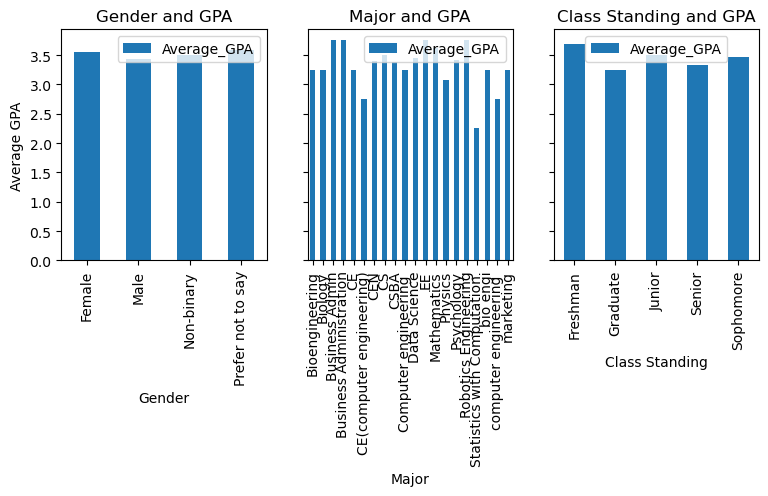

In [5]:
# Makes a pair plot that shows the average GPA based on gender, major, and class standing
pairplot_gender_gpa = df.pivot_table(index=['gender'], values=['Average_GPA'], aggfunc='mean')
pairplot_class_standing_gpa = df.pivot_table(index=['class_standing'], values=['Average_GPA'], aggfunc='mean')
pairplot_major_gpa = df.pivot_table(index=['major'], values=['Average_GPA'], aggfunc='mean')

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

pairplot_gender_gpa.plot(kind = 'bar', ax = axs[0])
axs[0].set_title('Gender and GPA')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Average GPA')

pairplot_major_gpa.plot(kind = 'bar', ax = axs[1])
axs[1].set_title('Major and GPA')
axs[1].set_xlabel('Major')

pairplot_class_standing_gpa.plot(kind = 'bar', ax = axs[2])
axs[2].set_title('Class Standing and GPA')
axs[2].set_xlabel('Class Standing')


In [6]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# display(df)

### 4. Can you state any hypotheses or make predictions? Which tests can you apply to verify your hypothesis?
- Hypothesis 1: There is a positive correlation between prioritizing health and academic success\
Prediction: Those who prioritize health and have a good mental well being perform better in school\
Test: Calculate the correlation coefficient between responses to health prioritization and UCR cumulative GPA.

- Hypothesis 2: Imposter syndrome negatively impacts mental wellbeing\
Prediction: Those who get imposter syndrome more frequently feel worse about themselves and do worse in school\
Test: Assess the correlation between experiences of imposter syndrome and the current state of mental wellbeing.

- Hypothesis 3: Financial stress negatively influences academic performance\
Prediction: Those who are stressed by finances do worse in school\
Test: Compare the average academic performance (UCR cumulative GPA) between those who report being stressed about their financial situation and those who do not.

### 5. Test your hypotheses.

In [7]:
# Hypothesis 1
# Test 1: point-biserial correlation
# Handling missing values (NaN)
df.dropna(inplace=True)
# Calculate point-biserial correlation coefficient and p-value
correlation_coefficient, p_value = pointbiserialr(df['prioritize_health'], df['Average_GPA'])

# Output the results
print("Hypothesis 1 results: ")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Print average GPA for each category
average_gpa_by_health_priority = df.groupby('prioritize_health')['Average_GPA'].mean()
print(f"Average GPA for No Health Priority: {average_gpa_by_health_priority[0]}")
print(f"Average GPA for Health Priority: {average_gpa_by_health_priority[1]}")

# Test 2: Chi-squared test
# Convert GPA to a categorical variable
df['GPA_Category'] = pd.cut(df['Average_GPA'], bins=[0, 2.5, 3.0, 3.5, 4.0], labels=['Low', 'Medium', 'High', 'Excellent'])

# Create a contingency table
contingency_table = pd.crosstab(df['prioritize_health'], df['GPA_Category'])

# Chi-squared test
chi2, chi2_p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared value: {chi2}")
print(f"P-value (Chi-squared): {chi2_p}\n")


# Hypothesis 2
# 1. Correlation Analysis (Pearson correlation)
# Create a list of imposter syndrome columns for different grade levels
imposter_syndrome_columns = ['imposter_syndrome_freshman', 'imposter_syndrome_sophomore', 'imposter_syndrome_junior', 'imposter_syndrome_senior', 'imposter_syndrome_graduate']

# Calculate the mean imposter syndrome score across grade levels
df['mean_imposter_syndrome'] = df[imposter_syndrome_columns].mean(axis=1)

# Assess the correlation between mean imposter syndrome score and mental wellbeing
pearson_corr_imp = df['mean_imposter_syndrome'].corr(df['mental_wellbeing'])
print("Hypothesis 2 results:")
print(f"Pearson Correlation (Imposter Syndrome vs Mental Wellbeing): {pearson_corr_imp}")

# Create a contingency table for imposter syndrome and academic performance
contingency_table_imp = pd.crosstab(df['mean_imposter_syndrome'], df['Average_GPA'])

# Perform Chi-Squared Test
chi2_stat_imp, p_value_chi2_imp, _, _ = chi2_contingency(contingency_table_imp)

print(f"Chi-Squared Statistic: {chi2_stat_imp}")
print(f"P-value (Chi-Squared Test): {p_value_chi2_imp}")

# Check for significance
if p_value_chi2_imp < 0.05:
    print("There is a significant relationship between mean imposter syndrome and academic performance.\n")
else:
    print("There is no significant relationship between mean imposter syndrome and academic performance.\n")


# Hypothesis 3
# Correlation analysis - Pearson correlation coefficient
pearson_corr_coefficient, pearson_p_value = pearsonr(df['financial_stress'], df['Average_GPA'])
print('Hypothesis 3 results: ')
print(f"Pearson Correlation Coefficient: {pearson_corr_coefficient}")
print(f"P-value (Pearson Correlation): {pearson_p_value}")

# Correlation analysis - Spearman rank correlation coefficient
spearman_corr_coefficient, spearman_p_value = spearmanr(df['financial_stress'], df['Average_GPA'])
print(f"Spearman Correlation Coefficient: {spearman_corr_coefficient}")
print(f"P-value (Spearman Correlation): {spearman_p_value}")



Hypothesis 1 results: 
Correlation Coefficient: 0.016498800224363147
P-value: 0.880153277747699
Average GPA for No Health Priority: 3.4791666666666665
Average GPA for Health Priority: 3.4919354838709675
Chi-squared value: 0.7287211981566823
P-value (Chi-squared): 0.8664285340490149

Hypothesis 2 results:
Pearson Correlation (Imposter Syndrome vs Mental Wellbeing): -0.3744701129003725
Chi-Squared Statistic: 31.25368707482993
P-value (Chi-Squared Test): 0.9707205828119089
There is no significant relationship between mean imposter syndrome and academic performance.

Hypothesis 3 results: 
Pearson Correlation Coefficient: -0.1632033545706208
P-value (Pearson Correlation): 0.13324566687388287
Spearman Correlation Coefficient: -0.18098280366751388
P-value (Spearman Correlation): 0.09539364764353168


# Hypothesis 1
## Tests Used: Point-Biserial correlation and Chi-Squared test
### Analysis:
- The correlation coefficient of 0.0165 suggests a very weak positive correlation between Health Priority and GPA.
- The p-value for the correlation is 0.8801, which is greater than the conventional significance level of 0.05, indicating that the correlation is not statistically significant.
- The average GPAs for the two groups are close, with 3.479 for No Health Priority and 3.492 for Health Priority. The chi-squared test found no statistically significant difference between the two groups.

### Conclusion: 
There is no significant linear relationship between Health Priority and GPA, and there is no significant difference in average GPA between students with and without Health Priority.

# Hypothesis 2
## Tests Used: Pearson Correlation and Chi-Squared test
### Analysis: 
- The correlation coefficient of -0.3745 indicates a moderate negative correlation between Imposter Syndrome and Mental Wellbeing.
- The Chi-squared value of 31.25 is relatively high, but the p-value of 0.9707 suggests that there is no significant relationship between mean imposter syndrome and academic performance.

### Conclusion:
There is no significant linear relationship between Imposter Syndrome and Mental Wellbeing, and there is no significant association between mean imposter syndrome and academic performance. 

# Hypothesis 3
## Tests Used: Pearson and Spearman correlation
### Analysis: 
- The Pearson correlation coefficient is -0.1632, and the p-value is 0.1332, suggesting a weak negative correlation that is not statistically significant.
- The Spearman correlation coefficient is -0.1810, with a p-value of 0.0954, indicating a weak negative correlation that approaches statistical significance.

### Conclusion:
There is no significant linear relationship between the variables, though the Spearman test suggests a potential trend that is just short of statistical significance. 

### 6. Draw the overall conclusion